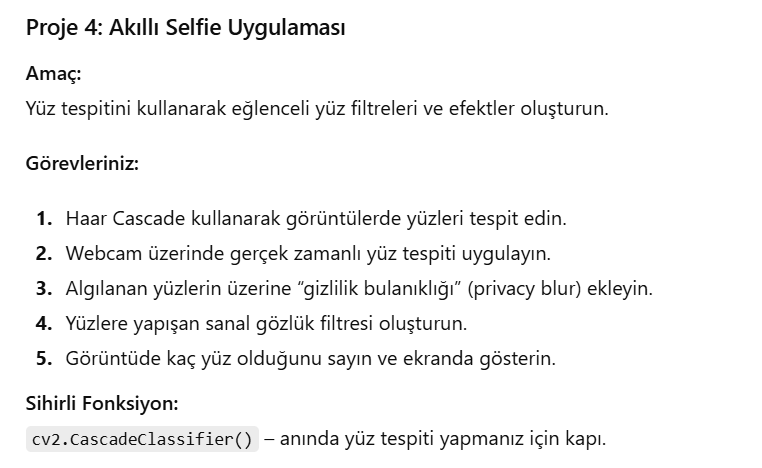

In [2]:
import cv2 as cv

In [7]:
# Haar Cascade yüz algılama modeli
face_cascade = cv.CascadeClassifier("frontal_face.xml")

# Fotoğrafı yükle
img = cv.imread("faces.jpg")

# Gri tona çevir (Haar için şart)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Yüzleri algıla
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30)
)

# Tespit edilen yüzleri kare ile çiz
for (x, y, w, h) in faces:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Sonucu göster
cv.imshow("Detected Faces", img)
cv.waitKey(0)
cv.destroyAllWindows()


In [ ]:
capture = cv.VideoCapture(0)
face_cascade = cv.CascadeClassifier("frontal_face.xml")

while True:
    ret,frame = capture.read()
    frame = cv.flip(frame,1)
    gray = cv.cvtColor(frame,cv.COLOR_BGR2GRAY) #önce griye çeviriyoruz bu adım mutlaka yapılamalı

    faces = face_cascade.detectMultiScale(gray,1.4,4) #koordinatları buluyoruz

    #Tanımlanan her yüz için bir dikdörtgen çiz
    for (x,y,w,h) in faces:
        cv.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),3)

    #Blur İşlemi
    face_roi = frame[y:y+h, x:x+w]                   # yüz bölgesi
    blurred_face = cv.GaussianBlur(face_roi, (51, 51), 0)  # blur uygula
    frame[y:y+h, x:x+w] = blurred_face               # eski yerine koy
    
    cv.imshow("frame",frame)

    if cv.waitKey(1) & 0xFF == ord("q"):
        break

capture.release()
cv.destroyAllWindows()

In [ ]:
capture = cv.VideoCapture(0)
face_cascade = cv.CascadeClassifier("frontal_face.xml")

# RGB gözlük resmi
glasses = cv.imread("glasses.png")   # 3 kanal (RGB)

while True:
    ret, frame = capture.read()
    frame = cv.flip(frame, 1)
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.4, 4)

    for (x, y, w, h) in faces:

        # ---- Gözlüğü resize et ----
        glasses_width = w
        glasses_height = int(h * 0.45)
        resized_glass = cv.resize(glasses, (glasses_width, glasses_height))

        # == MASKE OLUŞTUR ==
        gray_glass = cv.cvtColor(resized_glass, cv.COLOR_BGR2GRAY)

        # Beyaz arka planı maskelemek (threshold)
        ret2, mask = cv.threshold(gray_glass, 250, 255, cv.THRESH_BINARY_INV)

        # Maske tersini al
        mask_inv = cv.bitwise_not(mask)

        # Yüz bölgesi (ROI)
        y1 = y + int(h * 0.25)
        y2 = y1 + glasses_height
        x1 = x
        x2 = x + glasses_width

        roi = frame[y1:y2, x1:x2]

        # Gözlüğün sadece çizgilerini al
        glass_fg = cv.bitwise_and(resized_glass, resized_glass, mask=mask)

        # ROI’nin arka planını temizle
        bg = cv.bitwise_and(roi, roi, mask=mask_inv)

        # Gözlük + yüz birleşimi
        combined = cv.add(bg, glass_fg)

        frame[y1:y2, x1:x2] = combined

    cv.imshow("frame", frame)

    if cv.waitKey(1) & 0xFF == ord("q"):
        break

capture.release()
cv.destroyAllWindows()


In [ ]:
capture = cv.VideoCapture(0)
face_cascade = cv.CascadeClassifier("frontal_face.xml")

while True:
    ret,frame = capture.read()
    frame = cv.flip(frame,1)
    gray = cv.cvtColor(frame,cv.COLOR_BGR2GRAY) #önce griye çeviriyoruz bu adım mutlaka yapılamalı

    faces = face_cascade.detectMultiScale(gray,1.4,4) #koordinatları buluyoruz

    #Tanımlanan her yüz için bir dikdörtgen çiz
    for (x,y,w,h) in faces:
        
        cv.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),3)

        #Yüz sayısını bulma
        face_count = len(faces)
        cv.putText(frame, f'Yuz Sayisi: {face_count}', (10, 30), 
        cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        
    cv.imshow("frame",frame)

    if cv.waitKey(1) & 0xFF == ord("q"):
        break

capture.release()
cv.destroyAllWindows()